# **Selection test Connecthink**

Welcome to the practical selection test for the Data Scientist position at Connectthink. This test is designed to evaluate your skills and knowledge in data analysis, Python programming, use of specific libraries such as pandas, numpy, and your ability to interpret and solve practical data problems.

Please read each section carefully and follow the instructions provided to complete the exercises. The quality of your code, the efficiency of your solutions, and the clarity of your analyzes will be considered in the evaluation. Creativity when answering the questions will also be highly valued. It is important to us that you go beyond what the numbers and graphs tell you. Write the conclusions and results you draw after each part.

Notes:

* You can use ChatGPT or similar to search for documentation, but never copy code directly generated by the model to the notebook.
* Add comments in code to express your reasoning process.
* **Add markdown cells to explain your reasonings and conclusions.**

Good luck!

## **PART 1**: Preparation and Exploratory Analysis of Data

In [804]:
%%capture
# Libraries requirements
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn

python(65883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

### 1. Load the dataset. how much data do you have how many attributes? is it unbalanced? Are all attributes usable?



Importing data to analize

In [806]:
# Read the csv file (location: data/raw)
wine_db = pd.read_csv('data/raw/3-winequalityN.csv')

Review the dimensions of the data

In [807]:
wine_db.shape # 6 497 samples and 13 columns

(6497, 13)

Variables data type

In [808]:
wine_db.dtypes # (1 string, 12 numeric (11 float64 and 1 int64)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Data review

In [809]:
wine_db.head(7)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


Checking unique values for categorical column and target

In [810]:
wine_db['type'].value_counts(dropna=False)

type
white    4898
red      1599
Name: count, dtype: int64

We have two types of wine: white and red

In [811]:
wine_db['quality'].value_counts(dropna=False)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

We have 7 types of quality of the wine

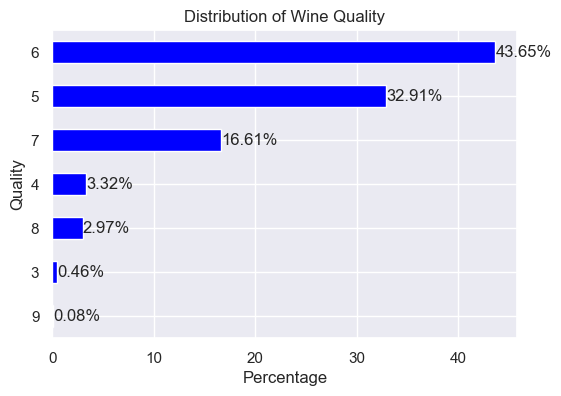

In [812]:
quality_distribution = (wine_db['quality'].value_counts()/len(wine_db['quality'])) * 100

plt.figure(figsize=(6, 4))
quality_distribution.plot(kind='barh', color='blue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Percentage')
plt.ylabel('Quality')
plt.gca().invert_yaxis()
for q_num, quality in enumerate(quality_distribution):
    plt.text(quality, q_num, f'{quality:.2f}%', va='center')
plt.show()

The target variable 'quality' is unbalanced, as we can see in the previous plot.

We will plot the correlation matrix to see what variables are more related with quality of wine and can be useful for our model.

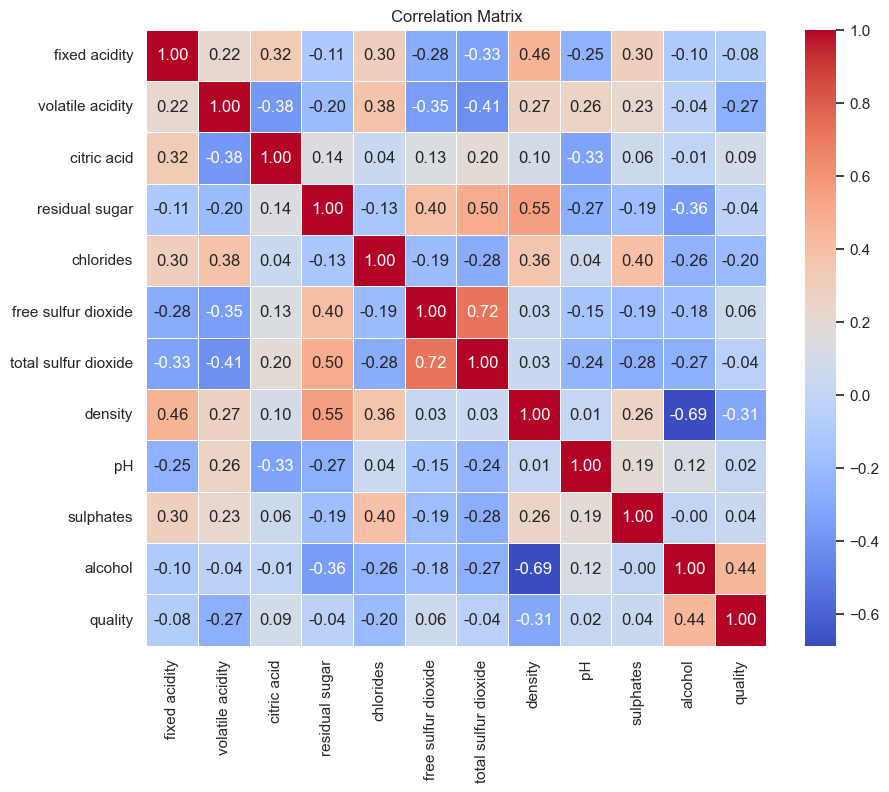

In [884]:
corr = wine_db.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We use the correlation matrix to see correlation between variables:
- 'total sulfur dioxide' and 'free sulfur dioxide' are high correlated (0.72) we have to be careful with multicollinearity (delete one of them or apply PCA to reduce to principal components)
- We see that the most correlated variables with 'quality' are 'alcohol','density' and 'volatile acidity'

### 4. Is it necessary to re-encode the data? why? if yes, do it

Yes, is it necessary because we have one categorical value and we want to convert it in numerical one (then we will decide if this variable helps with the classification algorithm but up to this point we are preparing all to analyze them later)

In [814]:
wine_db['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

We are going to re-encode the column 'type' in this way:
- white -> 0
- red -> 1
  
In this case each of the values of 'type' represents a category of wine so we are going to use label encoding (mapping manually)

In [815]:
wine_db['type'] = wine_db['type'].map({'white': 0, 'red': 1})

In [816]:
wine_db.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [817]:
wine_db['type'].value_counts()

type
0    4898
1    1599
Name: count, dtype: int64

### 2. Need to clean up NaNs? why? if yes, do it

Yes we have some NaNs, they are very few  so we can replace them with a measure of central tendency (can be the mean or the median depending if the distributions are affected with outliers. In this case we have so few missing values that we just going to replace them with the mean value of their group.

In [818]:
# Missing values
missing_val = pd.DataFrame(wine_db.isnull().sum()).sort_values(0,ascending=True)
missing_val.columns = ['vacios']
missing_val['vacios%'] = round(missing_val['vacios']/wine_db.shape[0], 2)*100
missing_val 

,vacios,vacios%
type,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
alcohol,0,0.0
quality,0,0.0
residual sugar,2,0.0
chlorides,2,0.0
citric acid,3,0.0
sulphates,4,0.0


We complete the missing values with the value of the mean

In [819]:
missing_val_col = wine_db.columns[wine_db.isnull().any()]

for col in missing_val_col:
    wine_db[col] = wine_db[col].fillna(wine_db[col].mean())

We check that there are no missing values remainding

In [820]:
# Missing values
missing_val = pd.DataFrame(wine_db.isnull().sum()).sort_values(0,ascending=True)
missing_val.columns = ['vacios']
missing_val['vacios%'] = round(missing_val['vacios']/wine_db.shape[0], 2)*100
missing_val 

,vacios,vacios%
type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


**Feature importance**

In [821]:
# Step 1: Split Data into Features (X) and Target (y)
X = wine_db.drop('quality', axis=1)
y = wine_db['quality']

# Train-Test Split (20% and rs=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                 Feature  Importance
11               alcohol    0.143389
2       volatile acidity    0.105258
7   total sulfur dioxide    0.099685
9                     pH    0.097957
10             sulphates    0.093175
5              chlorides    0.085244
1          fixed acidity    0.082198
6    free sulfur dioxide    0.081169
4         residual sugar    0.078224
8                density    0.072330
3            citric acid    0.060299
0                   type    0.001073


Based on the feature importance we decided to drop type column

In [822]:
wine_db=wine_db.drop('type',axis=1)

### 3. Is it necessary to normalize the data? why? if yes, do it

Yes, because we have some variables that doesnt share the same scale between them. First we are going to get rid of outliers

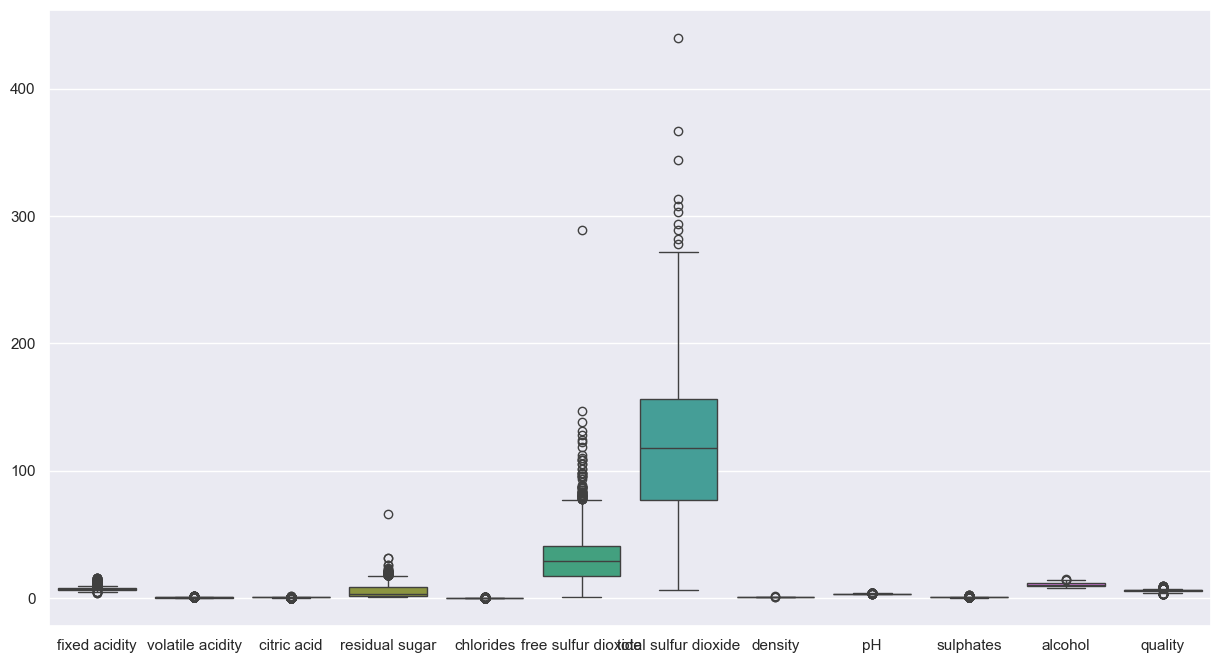

In [823]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wine_db)
plt.show()

We are going to clean outliers using the 1.5*IQR method, this means that all the values that are outside the whiskers will be deleted

In [885]:
wine_db_cleaned=wine_db.copy()
for column in wine_db_cleaned.columns:
    if column != 'type' and column != 'quality':
        Q1 = wine_db_cleaned[column].quantile(0.25)
        Q3 = wine_db_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
    
        outliers_lower = wine_db_cleaned[column] < lower_whisker
        outliers_upper = wine_db_cleaned[column] > upper_whisker
    
        nearest_lower = wine_db_cleaned[column][~outliers_lower].min()  
        wine_db_cleaned.loc[outliers_lower, column] = nearest_lower
    
        nearest_upper = wine_db_cleaned[column][~outliers_upper].max()
        wine_db_cleaned.loc[outliers_upper, column] = nearest_upper
    

No more outliers present

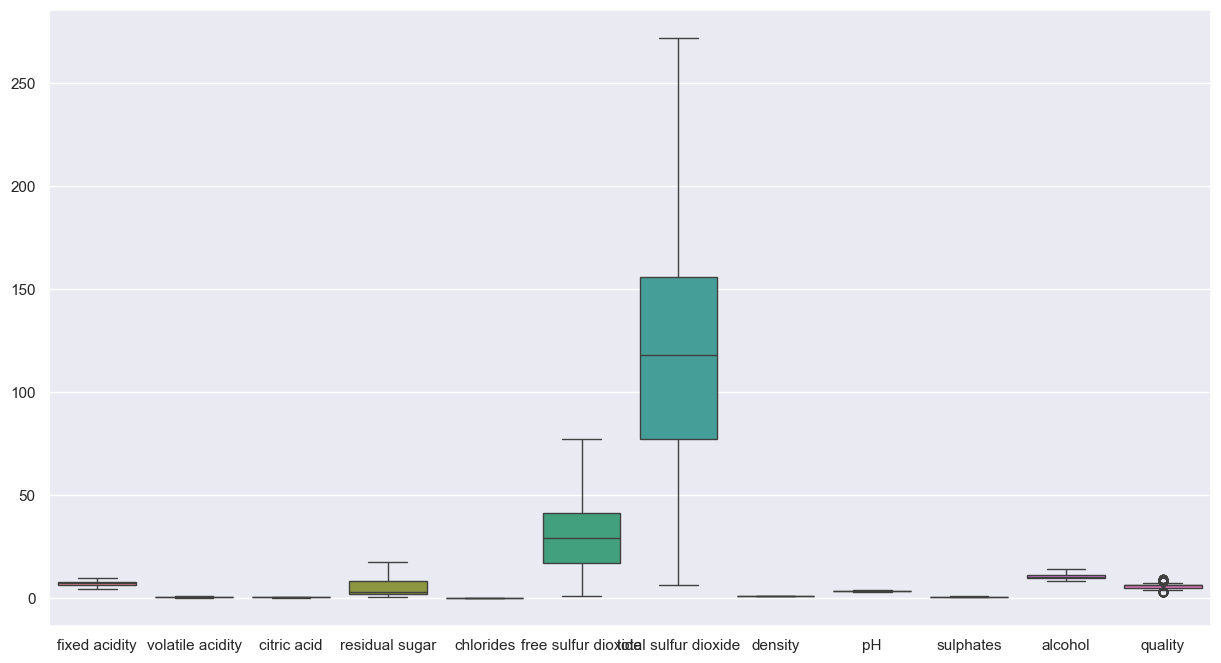

In [886]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wine_db_cleaned)
plt.show()

Now we are going to scale the variables

In [826]:
numeric_columns = wine_db_cleaned.select_dtypes(include=['float64', 'int64']).columns
wine_db_scaled = wine_db_cleaned.copy()
scaler = StandardScaler()
wine_db_scaled[numeric_columns] = scaler.fit_transform(wine_db_scaled[numeric_columns])

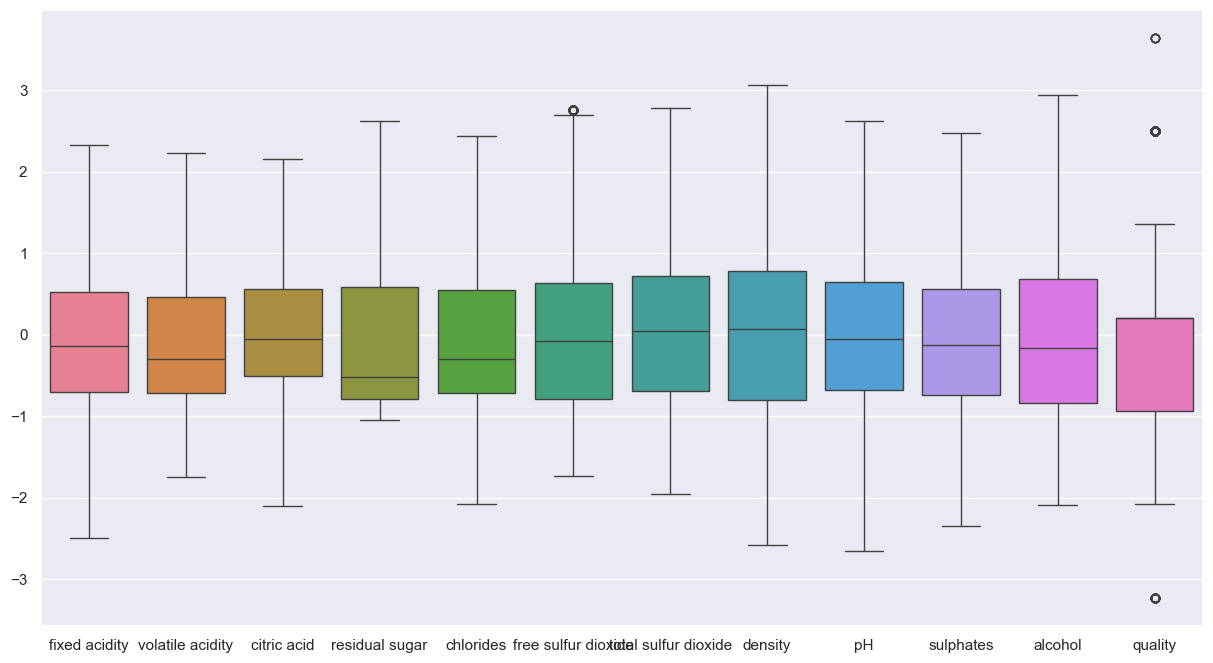

In [827]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wine_db_scaled)
plt.show()

### 5. Are there strongly correlated variables? if yes, would you perform any operation, combination and/or elimination?

As I tell before there are two variables that are strongly correlated , one option will be to eliminate one of them , but in this case we are going to apply a PCA to reduce to its principal components.

In [828]:
X_train = wine_db_cleaned.drop('quality', axis=1)
y_train = wine_db_cleaned['quality']

pca_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = X_train.shape[1],random_state=10))])
pca_pipe.fit(X_train)

X_train_pca = pca_pipe.transform(X_train)

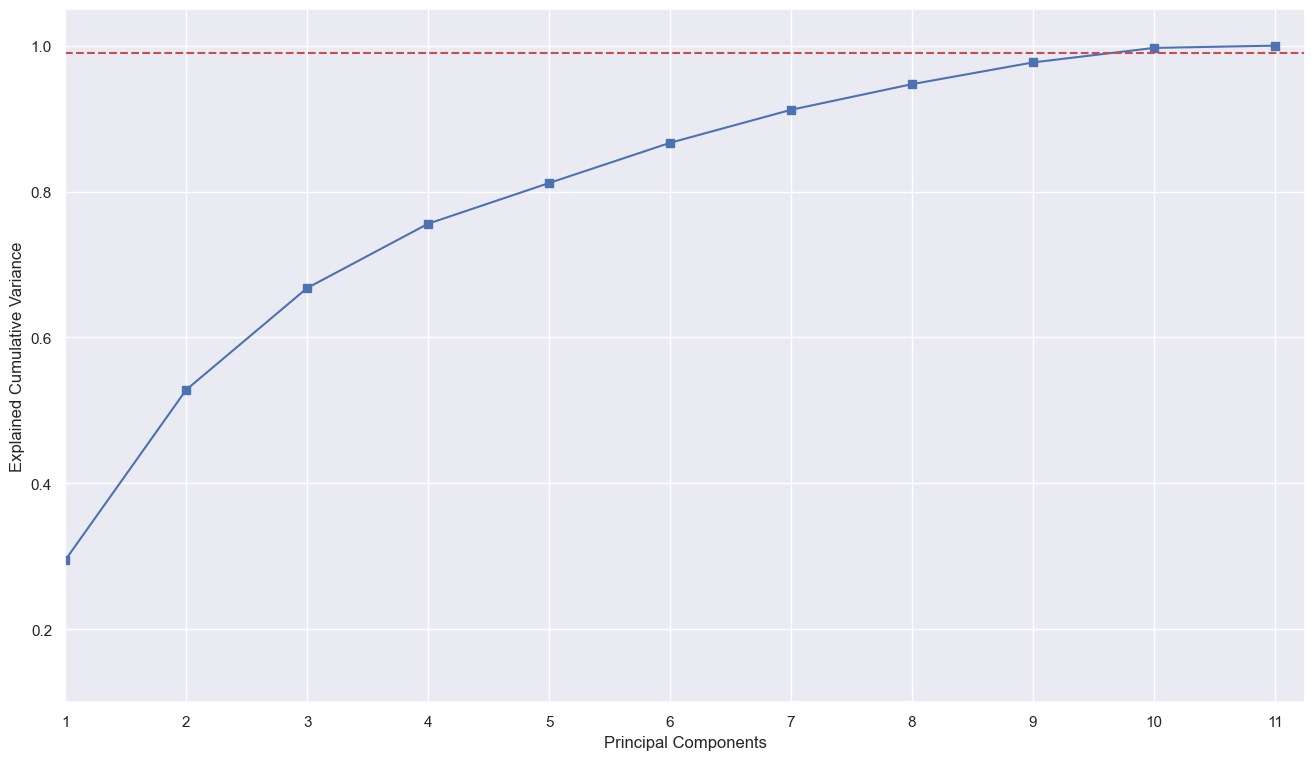

In [829]:
plt.figure(figsize = (16,9))
plt.plot([i for i in range(1,X_train_pca.shape[1] + 1)], np.cumsum(pca_pipe[-1].explained_variance_ratio_), '-s')
plt.ylabel('Explained Cumulative Variance')
plt.xlabel('Principal Components')
plt.xlim(1, X_train_pca.shape[1] + 0.25)
plt.ylim(0.1, 1.05)
plt.xticks([i for i in range(1,X_train_pca.shape[1] + 1)])
plt.axhline(y = 0.99, color = 'r', linestyle = '--', label='Threshold') 
plt.show()

In [830]:
cummulative_variance = np.cumsum(pca_pipe[-1].explained_variance_ratio_)

# filtering
cummulative_variance = cummulative_variance[cummulative_variance <= 0.99]

# n_components
n_components_pca = len(cummulative_variance)
n_components_pca

9

**Before applying the PCA we found, we are going to balance the data**

In [831]:
wine_db_cleaned['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Applying Smote Oversampling method to oversample the data

In [832]:
X_train = wine_db_cleaned.drop('quality', axis=1)
y_train = wine_db_cleaned['quality']

X_train_to_res, X_test_to_res, y_train_to_res, y_test_to_res = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

smote = SMOTE(k_neighbors=3,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_to_res, y_train_to_res)


pca_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 9,random_state=10))])
pca_pipe.fit(X_train_smote)

X_train_pca = pca_pipe.transform(X_train_smote)
X_test_pca = pca_pipe.transform(X_test_to_res)

We put a treshold of 99% of data we dont want to lose

### 6. Which performance measure (F-score, accuracy, etc) is most appropriate for the problem? why?

Most appropiate for the problem:
- In my opinion "Accuracy" because if give us the amount of values that were acerted by the algorithm, and ROC-AUC (Area Under the Receiver Operating Characteristic Cuve). 

Other metrics:
- Also is important to see the Precision, Recall and F1-Score.

## **PART 2**: Construction and Evaluation of Classification Models

### 7. Test between 3 and 8 different classification models with different combinations of parameters, applying cross validation (k-fold) to train and evaluate each one. Then, graph the mean and standard deviation of the scores obtained for each model. Based on these results, determine which was the best model. Explain what is the best model.

**First approach using sinthetic data generated with smote**

In [833]:
X_train_pca_copy = X_train_pca.copy()
y_train_copy = y_train_smote.copy()

# Train-Test split (30%)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_train_pca_copy, y_train_copy, test_size=0.3, random_state=0)

**Benchmark model**

In [834]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

persistence_model = DummyClassifier()

# Fitting the model using the PCA applied data
persistence_model.fit(X_train_p, y_train_p)
y_pred = persistence_model.predict(X_test_p)

# Calculating metrics
accuracy = accuracy_score(y_test_p, y_pred)
print("Persistence Model Accuracy:", accuracy)

Persistence Model Accuracy: 0.13590844062947066


**Modeling**

Logistic Regression: Mean CV Accuracy: 0.5553111135289354, Standard Deviation: 0.011561144365853706, Test Accuracy: 0.2723076923076923
Decision Tree: Mean CV Accuracy: 0.5751063238191951, Standard Deviation: 0.012332322278810487, Test Accuracy: 0.5128205128205128
Random Forest: Mean CV Accuracy: 0.6593399339933994, Standard Deviation: 0.008728241803505775, Test Accuracy: 0.598974358974359
SVM: Mean CV Accuracy: 0.2529123901401129, Standard Deviation: 0.014070279751153837, Test Accuracy: 0.4523076923076923
K-Nearest Neighbors: Mean CV Accuracy: 0.48295748256144294, Standard Deviation: 0.012042043433397716, Test Accuracy: 0.44564102564102565
Gaussian Naive Bayes: Mean CV Accuracy: 0.49285484592415285, Standard Deviation: 0.009690090167589612, Test Accuracy: 0.2605128205128205


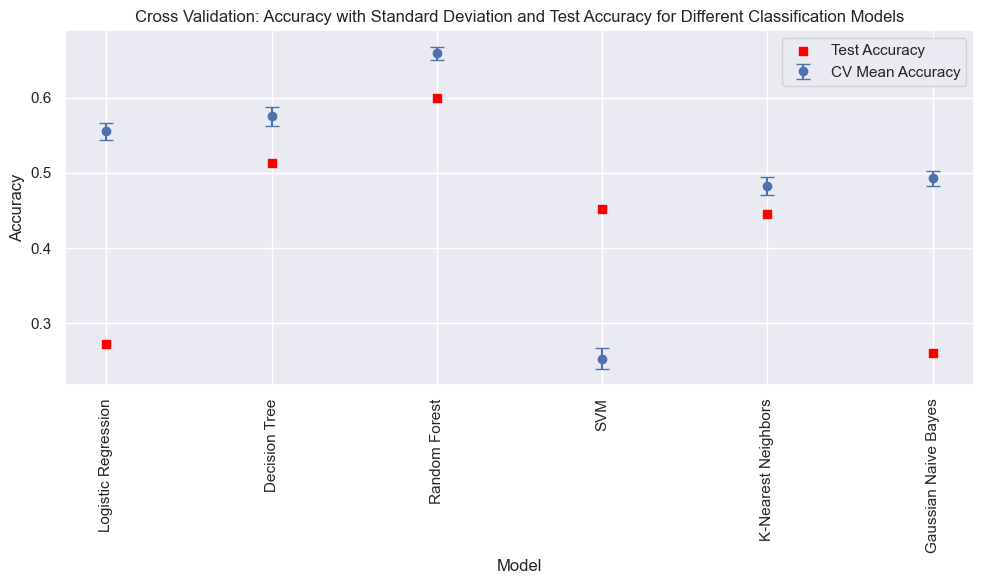

In [835]:
# Prepare a list to store the mean and standard deviation of scores for each model
results_mean_cv = []
results_std_cv = []
results_test_accuracy = []

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42,class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42,class_weight='balanced')),
    ('SVM', SVC(random_state=42,class_weight='balanced')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB())
]

# Iterate over the models and evaluate them using cross-validation
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_s, y_train_s, cv=kfold)
    results_mean_cv.append(cv_results.mean())
    results_std_cv.append(cv_results.std())

    # Training model
    model.fit(X_train_p, y_train_p)

    # Validating
    test_accuracy = model.score(X_test_pca, y_test_to_res)
    results_test_accuracy.append(test_accuracy)
    
    print(f"{name}: Mean CV Accuracy: {cv_results.mean()}, Standard Deviation: {cv_results.std()}, Test Accuracy: {test_accuracy}")

# Plotting to compare
plt.figure(figsize=(10, 6))
plt.errorbar([name for name, _ in models], results_mean_cv, yerr=results_std_cv, fmt='o', capsize=5, label='CV Mean Accuracy')
plt.scatter([name for name, _ in models], results_test_accuracy, color='red', marker='s', label='Test Accuracy')
plt.title('Cross Validation: Accuracy with Standard Deviation and Test Accuracy for Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Second approach, grouping classifications into a binary classification of wine**

So we see that our target variable is unbalanced ,so another approach can be group them in two binary group:
- 0: Low Quality Wine (3,4,5)
- 1: High Quality Wine (6,7,8,9)

In [836]:
wine_db_cleaned_group=wine_db_cleaned.copy()
wine_db_cleaned_group['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [837]:
wine_db_cleaned_group["wine_quality"] = wine_db_cleaned_group.quality.apply(lambda q: 'low' if q <= 5 else 'high')

In [838]:
wine_db_cleaned_group['wine_quality'].value_counts()

wine_quality
high    4113
low     2384
Name: count, dtype: int64

In [839]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
wine_db_cleaned_group['wine_quality_encoded'] = label_encoder.fit_transform(wine_db_cleaned_group['wine_quality'])

In [840]:
wine_db_cleaned_group.drop('quality',axis=1,inplace=True)
wine_db_cleaned_group.drop('wine_quality',axis=1,inplace=True)

In [841]:
X_train = wine_db_cleaned_group.drop('wine_quality_encoded', axis=1)
y_train = wine_db_cleaned_group['wine_quality_encoded']

pca_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 9,random_state=10))])
pca_pipe.fit(X_train)

X_train_pca = pca_pipe.transform(X_train)

In [842]:
X_train_pca_copy = X_train_pca.copy()

# Train-Test split (30%)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_train_pca_copy, y_train, test_size=0.3, random_state=0)

**Benchmark model**

In [843]:
persistence_model = DummyClassifier()
persistence_model.fit(X_train_p, y_train_p)

y_pred = persistence_model.predict(X_test_p)
accuracy = accuracy_score(y_test_p, y_pred)
print("Persistence Model Accuracy:", accuracy)

Persistence Model Accuracy: 0.6230769230769231


Logistic Regression: Mean CV Accuracy: 0.7411467740180612, Standard Deviation: 0.005558046309742645, Test Accuracy: 0.7343589743589743
Decision Tree: Mean CV Accuracy: 0.7294969716751896, Standard Deviation: 0.01755822365218742, Test Accuracy: 0.7548717948717949
Random Forest: Mean CV Accuracy: 0.7976726024250776, Standard Deviation: 0.011079409037465815, Test Accuracy: 0.823076923076923
SVM: Mean CV Accuracy: 0.7506055440708906, Standard Deviation: 0.008474187319518767, Test Accuracy: 0.7682051282051282
K-Nearest Neighbors: Mean CV Accuracy: 0.7422536539368224, Standard Deviation: 0.014285146287272002, Test Accuracy: 0.7528205128205128
Gaussian Naive Bayes: Mean CV Accuracy: 0.7365284880136367, Standard Deviation: 0.010496186893499043, Test Accuracy: 0.7333333333333333


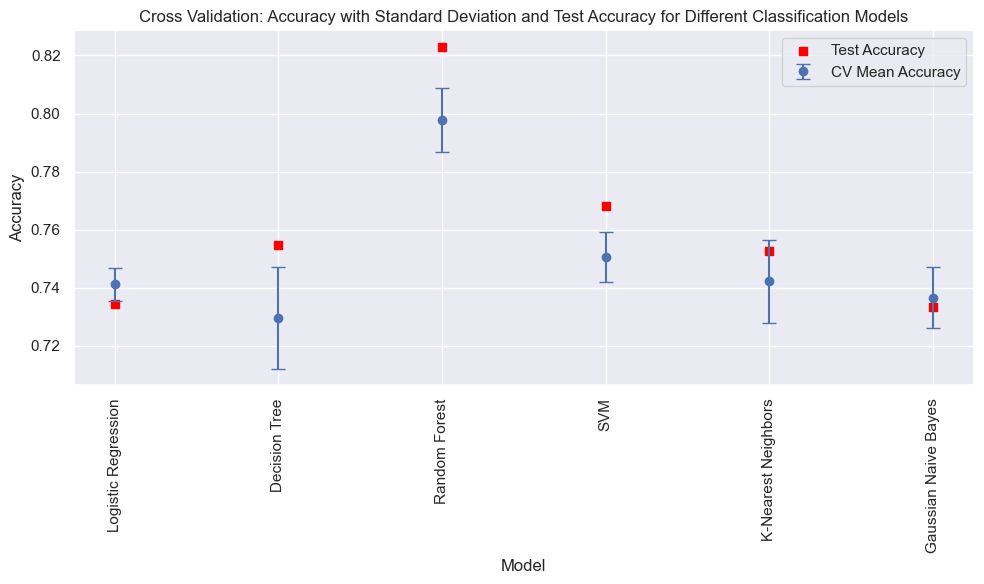

In [844]:
results_mean_cv = []
results_std_cv = []
results_test_accuracy = []

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42,class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42,class_weight='balanced')),
    ('SVM', SVC(random_state=42,class_weight='balanced')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB())
]

# Iterate over the models and evaluate them using cross-validation
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_p, y_train_p, cv=kfold)
    results_mean_cv.append(cv_results.mean())
    results_std_cv.append(cv_results.std())
    
    # Training model
    model.fit(X_train_p, y_train_p)
    
    # Validating
    test_accuracy = model.score(X_test_p, y_test_p)
    results_test_accuracy.append(test_accuracy)
    
    print(f"{name}: Mean CV Accuracy: {cv_results.mean()}, Standard Deviation: {cv_results.std()}, Test Accuracy: {test_accuracy}")

# Plotting to compare
plt.figure(figsize=(10, 6))
plt.errorbar([name for name, _ in models], results_mean_cv, yerr=results_std_cv, fmt='o', capsize=5, label='CV Mean Accuracy')
plt.scatter([name for name, _ in models], results_test_accuracy, color='red', marker='s', label='Test Accuracy')
plt.title('Cross Validation: Accuracy with Standard Deviation and Test Accuracy for Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### For the 2 best classification methods, and justifying the answers with data and/or graphics in addition to a brief explanation:

The best models that we are going to choose are:
- Random Forest
- SVM

### 8. What is the best set of parameters for each method

**Random Forest**

In [845]:
%%script false --no-raise-error
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42,class_weight='balanced')

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Smaller values underfitting, high values computational cost
    'max_depth': [None, 10, 20],    #prevent overfitting
    'min_samples_split': [2, 5, 10],   #max number of internal node
    'min_samples_leaf': [1, 2, 4],     # max number of leaf 
    'max_features': ['auto', 'sqrt']  
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_p, y_train_p)

# Get parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate metrics
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_p, y_test_p)
print("Test Accuracy of Best Model:", test_accuracy)


python(65895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Best Cross-Validation Accuracy: 0.7761138311633361

Test Accuracy of Best Model: 0.7974358974358975

**SVM**

In [850]:
%%script false --no-raise-error
from sklearn.model_selection import GridSearchCV

# Define the KNN classifier
svc_classifier =  SVC(random_state=42,class_weight='balanced')

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  
}

# Perform GridSearchCV
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_p, y_train_p)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate metrics
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_p, y_test_p)
print("Test Accuracy of Best Model:", test_accuracy)


python(65932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Best Cross-Validation Accuracy: 0.7591820500731392

Test Accuracy of Best Model: 0.7753846153846153

### 9. Which has a better computational cost?

### 10. Regardless of the measure defined in point 6, for each model what would be the best threshold to determine the decision boundary? (You can use the G-mean method)

### 11. Compare confusion matrices and their metrics

**RandomForest (Computational Cost)**

In [853]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

best_params_rf = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

best_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_rf)

start_time_training = time.time()
best_model.fit(X_train_p, y_train_p)
training_time = time.time() - start_time_training

start_time_prediction = time.time()
y_pred = best_model.predict(X_test_p)
prediction_time = time.time() - start_time_prediction

total_time = training_time + prediction_time

print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")
print("Total Time:", total_time, "seconds")

test_accuracy = best_model.score(X_test_p, y_test_p)
print("Test Accuracy of Best Model:", test_accuracy)

Training Time: 1.6093928813934326 seconds
Prediction Time: 0.033479928970336914 seconds
Total Time: 1.6428728103637695 seconds
Test Accuracy of Best Model: 0.823076923076923


**Big O-Notion** (ChatGPT definitions)

Time Complexity:

Training: O(n * m * log(m)) to O(n * m^2 * log(m)), where n is the number of trees in the forest, and m is the number of features. The time complexity for training a random forest depends on the number of trees and the number of features. Each tree is built independently, so the total time complexity is the product of the number of trees and the time complexity of building each tree, which typically involves sorting and selecting features for splitting nodes.

Prediction: O(n * log(m)), where n is the number of trees in the forest, and m is the number of features. The time complexity for prediction in a random forest is typically logarithmic with respect to the number of features because each decision tree traverses a subset of features at each node to make predictions.

**RandomForest (G-Mean and Treshold)**

In [873]:
best_params_rf = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
best_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params_rf)

best_model.fit(X_train_p, y_train_p)
y_pred_rf = best_model.predict_proba(X_test_p)

thresholds = np.arange(0.1, 1.0, 0.05)

for threshold in thresholds:
    y_pred_binary = (y_pred[:, 1] > threshold).astype(int)
    
    conf_matrix = confusion_matrix(y_test_p, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    gmean = np.sqrt(sensitivity * specificity)
    
    if gmean > best_gmean:
        best_threshold = threshold
        best_gmean = gmean

print("Best Threshold:", best_threshold)
print("Best G-mean:", best_gmean)

Best Threshold: 0.40000000000000013
Best G-mean: 0.811228277879944


**RandomForest (Confusion Matrix)**

In [878]:
# Threshold the predicted probabilities to obtain binary predictions
y_pred_binary_rf = (y_pred_rf[:, 1] > 0.4).astype(int)

# Evaluate metrics using the chosen threshold
conf_matrix = confusion_matrix(y_test_p, y_pred_binary_rf)
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

print(classification_report(y_test_p, y_pred_binary_rf))

Confusion Matrix:
[[973 242]
 [131 604]]
Sensitivity: 0.8217687074829932
Specificity: 0.8008230452674897
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1215
           1       0.71      0.82      0.76       735

    accuracy                           0.81      1950
   macro avg       0.80      0.81      0.80      1950
weighted avg       0.82      0.81      0.81      1950



- Sensitivity: 0.8217687074829932 (Positives cases)
- Specificity: 0.8008230452674897 (Negative cases)

**SVM (Suppor vector classifier) - Computational Cost**

In [879]:
best_params_knn = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

best_model = SVC(random_state=42,class_weight='balanced')

start_time_training = time.time()
best_model.fit(X_train_p, y_train_p)
training_time = time.time() - start_time_training

start_time_prediction = time.time()
y_pred = best_model.predict(X_test_p)
prediction_time = time.time() - start_time_prediction

total_time = training_time + prediction_time

print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")
print("Total Time:", total_time, "seconds")

test_accuracy = best_model.score(X_test_p, y_test_p)
print("Test Accuracy of Best Model:", test_accuracy)

print(classification_report(y_test_p, y_pred_binary_svc))

Training Time: 0.2518579959869385 seconds
Prediction Time: 0.12532711029052734 seconds
Total Time: 0.3771851062774658 seconds
Test Accuracy of Best Model: 0.7682051282051282
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1215
           1       0.69      0.75      0.71       735

    accuracy                           0.78      1950
   macro avg       0.76      0.77      0.76      1950
weighted avg       0.78      0.78      0.78      1950



**Big O-Notion** (ChatGPT definitions)

Time Complexity:

Training: O(1), as KNN is a lazy learning algorithm that does not involve training. The algorithm simply stores the training data for later use during prediction.

Prediction: O(n * d), where n is the number of training examples and d is the number of dimensions (features) in the input space. The time complexity for prediction in KNN involves computing distances between the query point and all training points, which can be computationally expensive, especially for large datasets with many training examples and dimensions.

**SVM (G-Mean and Treshold)**

In [881]:
best_params_knn = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
best_model = SVC(random_state=42,class_weight='balanced',probability=True)

best_model.fit(X_train_p, y_train_p)
y_pred = best_model.predict_proba(X_test_p)

thresholds = np.arange(0.1, 1.0, 0.05)

for threshold in thresholds:
    y_pred_binary = (y_pred[:, 1] > threshold).astype(int)
    
    conf_matrix = confusion_matrix(y_test_p, y_pred_binary)
    TN, FP, FN, TP = conf_matrix.ravel()
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    gmean = np.sqrt(sensitivity * specificity)
    
    if gmean > best_gmean:
        best_threshold = threshold
        best_gmean = gmean

print("Best Threshold:", best_threshold)
print("Best G-mean:", best_gmean)

Best Threshold: 0.40000000000000013
Best G-mean: 0.811228277879944


**SVM (Confusion Matrix)**

In [882]:
# Threshold the predicted probabilities to obtain binary predictions
y_pred_binary_svc = (y_pred[:, 1] > 0.4).astype(int)

# Evaluate metrics using the chosen threshold
conf_matrix = confusion_matrix(y_test_p, y_pred_binary_svc)
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

print(classification_report(y_test_p, y_pred_binary_svc))

Confusion Matrix:
[[964 251]
 [187 548]]
Sensitivity: 0.745578231292517
Specificity: 0.7934156378600823
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1215
           1       0.69      0.75      0.71       735

    accuracy                           0.78      1950
   macro avg       0.76      0.77      0.76      1950
weighted avg       0.78      0.78      0.78      1950



- Sensitivity: 0.745578231292517 (Positives cases)
- Specificity: 0.7934156378600823 (Negative cases)